In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv
/kaggle/input/uber-ride-analytics-dashboard/Dasboard.gif
/kaggle/input/uber-ride-analytics-dashboard/Uber.pbix


In [4]:
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv")

In [6]:
df.head(3)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card


In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [9]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [11]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)


Date                                  0.0
Time                                  0.0
Booking ID                            0.0
Booking Status                        0.0
Customer ID                           0.0
Vehicle Type                          0.0
Pickup Location                       0.0
Drop Location                         0.0
Avg VTAT                              7.0
Avg CTAT                             32.0
Cancelled Rides by Customer          93.0
Reason for cancelling by Customer    93.0
Cancelled Rides by Driver            82.0
Driver Cancellation Reason           82.0
Incomplete Rides                     94.0
Incomplete Rides Reason              94.0
Booking Value                        32.0
Ride Distance                        32.0
Driver Ratings                       38.0
Customer Rating                      38.0
Payment Method                       32.0
dtype: float64


In [12]:
df = df.drop(columns=['Cancelled Rides by Customer', 
                      'Reason for cancelling by Customer', 
                      'Cancelled Rides by Driver',
                      'Driver Cancellation Reason',
                      'Incomplete Rides',
                      'Incomplete Rides Reason'])


In [13]:
df['Booking Value'].fillna(df['Booking Value'].median(), inplace=True)
df['Ride Distance'].fillna(df['Ride Distance'].median(), inplace=True)
df['Driver Ratings'].fillna(df['Driver Ratings'].mean(), inplace=True)
df['Customer Rating'].fillna(df['Customer Rating'].mean(), inplace=True)


/tmp/ipykernel_36/1671738494.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Booking Value'].fillna(df['Booking Value'].median(), inplace=True)
/tmp/ipykernel_36/1671738494.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [14]:
df['Payment Method'].fillna(df['Payment Method'].mode()[0], inplace=True)


/tmp/ipykernel_36/703726951.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Payment Method'].fillna(df['Payment Method'].mode()[0], inplace=True)


In [15]:
print(df.isnull().sum())


Date                   0
Time                   0
Booking ID             0
Booking Status         0
Customer ID            0
Vehicle Type           0
Pickup Location        0
Drop Location          0
Avg VTAT           10500
Avg CTAT           48000
Booking Value          0
Ride Distance          0
Driver Ratings         0
Customer Rating        0
Payment Method         0
dtype: int64


In [ ]:
df['Avg VTAT'].fillna(df['Avg VTAT'].median(), inplace=True)
df['Avg CTAT'].fillna(df['Avg CTAT'].median(), inplace=True)


In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time


In [17]:
for col in ['Booking Status', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Payment Method']:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head(), "\n")


Booking Status: 5 unique values
Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64 

Vehicle Type: 7 unique values
Vehicle Type
Auto             37419
Go Mini          29806
Go Sedan         27141
Bike             22517
Premier Sedan    18111
Name: count, dtype: int64 

Pickup Location: 176 unique values
Pickup Location
Khandsa            949
Barakhamba Road    946
Saket              931
Badarpur           921
Pragati Maidan     920
Name: count, dtype: int64 

Drop Location: 176 unique values
Drop Location
Ashram             936
Basai Dhankot      917
Lok Kalyan Marg    916
Narsinghpur        913
Cyber Hub          912
Name: count, dtype: int64 

Payment Method: 5 unique values
Payment Method
UPI            93909
Cash           25367
Uber Wallet    12276
Credit Card    10209
Debit Card      8239
Name: count, dtype: int64 



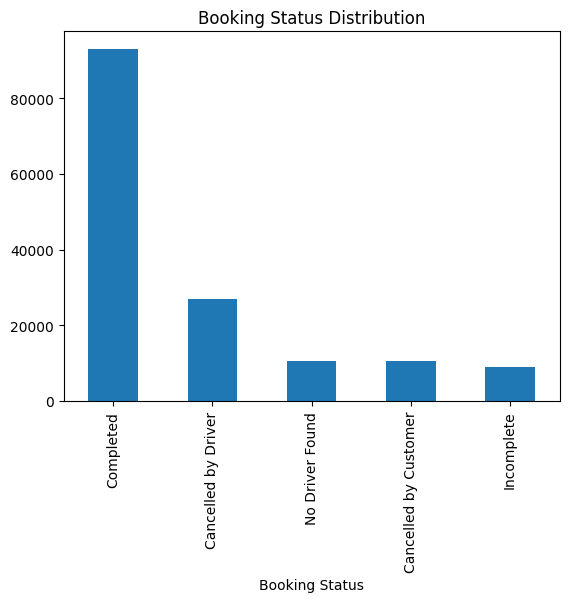

In [18]:
df['Booking Status'].value_counts().plot(kind='bar')
plt.title("Booking Status Distribution")
plt.show()

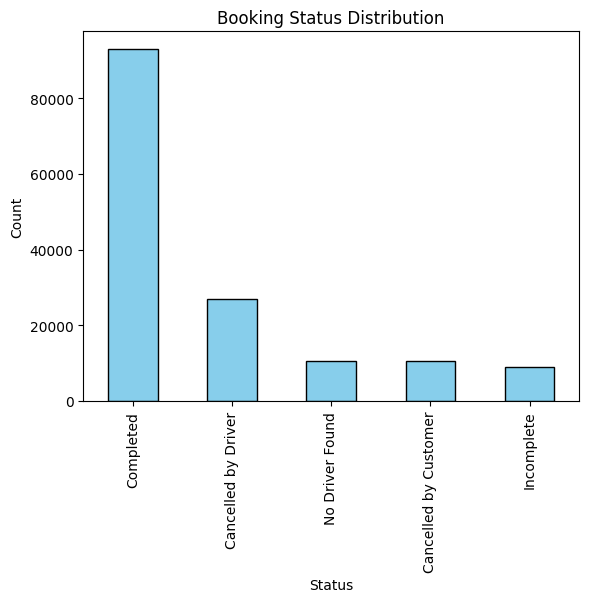

In [19]:
df['Booking Status'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Booking Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

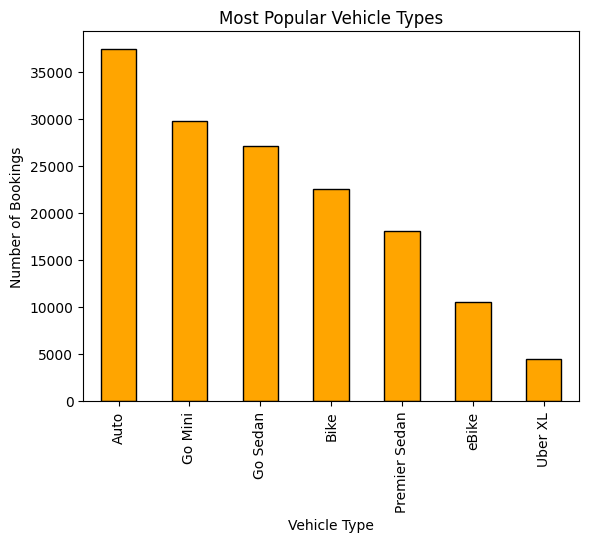

In [20]:
df['Vehicle Type'].value_counts().plot(kind='bar', color='orange', edgecolor='black')
plt.title("Most Popular Vehicle Types")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Bookings")
plt.show()


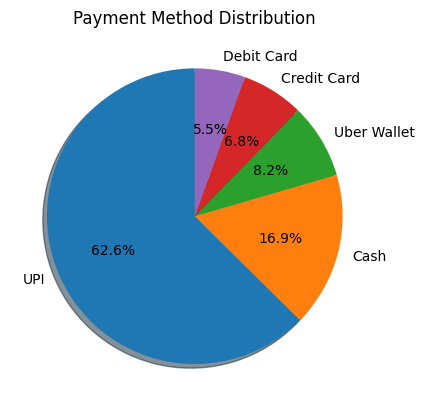

In [21]:
df['Payment Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()


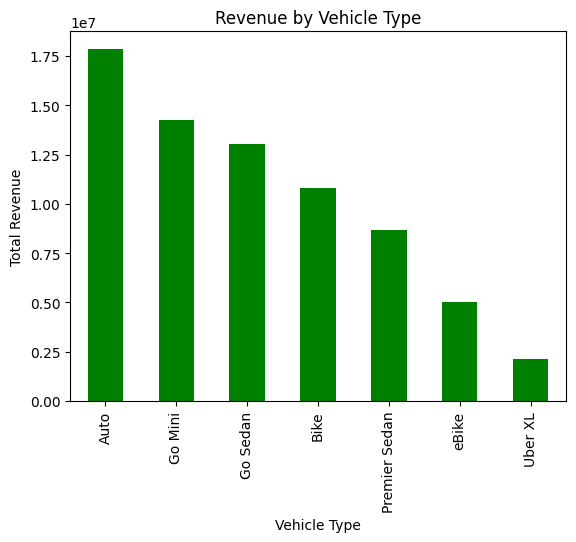

In [22]:
df.groupby('Vehicle Type')['Booking Value'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title("Revenue by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Total Revenue")
plt.show()


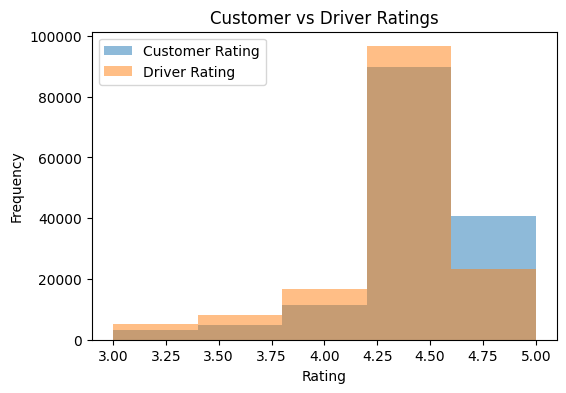

In [23]:
plt.figure(figsize=(6,4))
plt.hist(df['Customer Rating'], bins=5, alpha=0.5, label='Customer Rating')
plt.hist(df['Driver Ratings'], bins=5, alpha=0.5, label='Driver Rating')
plt.legend()
plt.title("Customer vs Driver Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


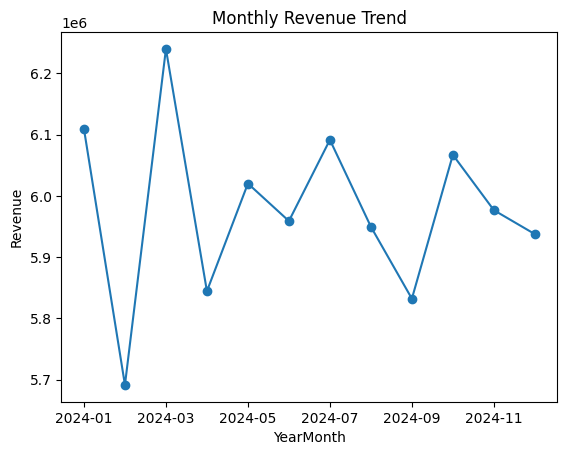

In [39]:
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)


df.groupby('YearMonth')['Booking Value'].sum().plot(kind='line', marker='o')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()


In [40]:
y = df['Booking Status']   # Target
X = df.drop(columns=['Booking Status', 'Booking ID', 'Customer ID', 'Date', 'Time'])


In [41]:
X = pd.get_dummies(X, drop_first=True)


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [44]:
X.isnull().sum()


Avg VTAT             10500
Avg CTAT             48000
Booking Value            0
Ride Distance            0
Driver Ratings           0
                     ...  
YearMonth_2024-08        0
YearMonth_2024-09        0
YearMonth_2024-10        0
YearMonth_2024-11        0
YearMonth_2024-12        0
Length: 377, dtype: int64

In [46]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X[['Avg VTAT', 'Avg CTAT']] = imputer.fit_transform(X[['Avg VTAT', 'Avg CTAT']])


In [47]:
X[['Avg VTAT', 'Avg CTAT']] = X[['Avg VTAT', 'Avg CTAT']].fillna(X[['Avg VTAT', 'Avg CTAT']].mean())


In [48]:
X = X.dropna(subset=['Avg VTAT', 'Avg CTAT'])
y = y.loc[X.index]


In [49]:
print(X.isnull().sum().sum())   # should be 0


0


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   # fill missing values
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9646

Classification Report:
                        precision    recall  f1-score   support

Cancelled by Customer       0.99      0.54      0.69      2100
  Cancelled by Driver       0.85      0.98      0.91      5400
            Completed       1.00      1.00      1.00     18600
           Incomplete       1.00      1.00      1.00      1800
      No Driver Found       0.96      1.00      0.98      2100

             accuracy                           0.96     30000
            macro avg       0.96      0.90      0.92     30000
         weighted avg       0.97      0.96      0.96     30000


Confusion Matrix:
 [[ 1124   963     0     0    13]
 [   16  5319     0     0    65]
 [    0     0 18600     0     0]
 [    0     0     0  1800     0]
 [    0     5     0     0  2095]]


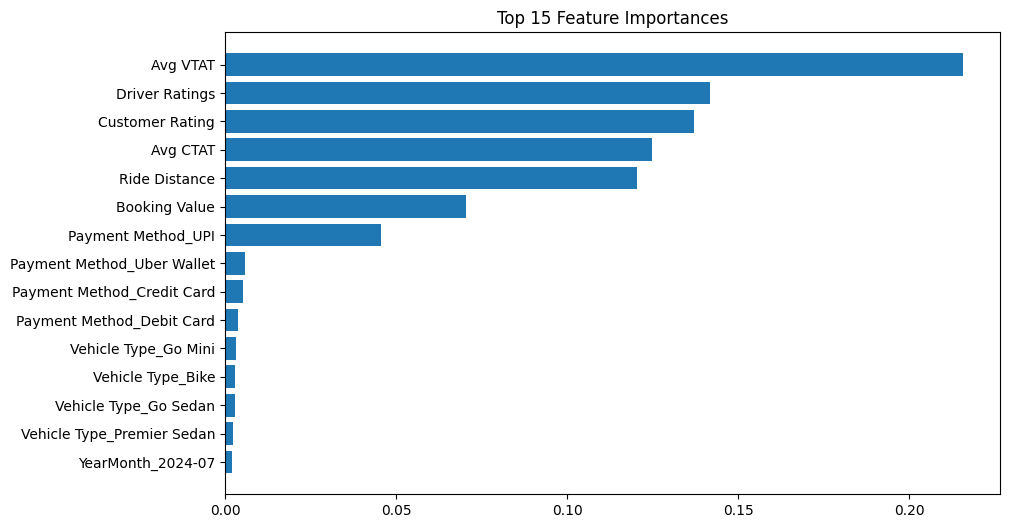

In [52]:
feature_importances = pipeline.named_steps['model'].feature_importances_
features = X.columns


importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'][:15], importance_df['Importance'][:15])
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances")
plt.show()

In [53]:
RandomForestClassifier(class_weight="balanced")


RandomForestClassifier(class_weight='balanced')